In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cargar dataset partidos
df_partidos = pd.read_csv('partidos_cebollitas.csv')

#Mostar primeras filas
df_partidos.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML


In [5]:
#Estadisticas descriptivas generales
df_partidos.describe()

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [15]:
#Promedio goles Cebollitas commo local y visitante
goles_local_cebo = df_partidos[df_partidos['equipo_local'] == 'Cebollitas FC']['goles_local'].mean()
goles_visitante_cebo = df_partidos[df_partidos['equipo_visitante'] == 'Cebollitas FC']['goles_visitante'].mean()
print(f"Promedio de goles de Cebollitas como local: {goles_local_cebo:.2f}")
print(f"Promedio de goles de Cebollitas como visitante: {goles_visitante_cebo:.2f}")


Promedio de goles de Cebollitas como local: 2.23
Promedio de goles de Cebollitas como visitante: 2.61


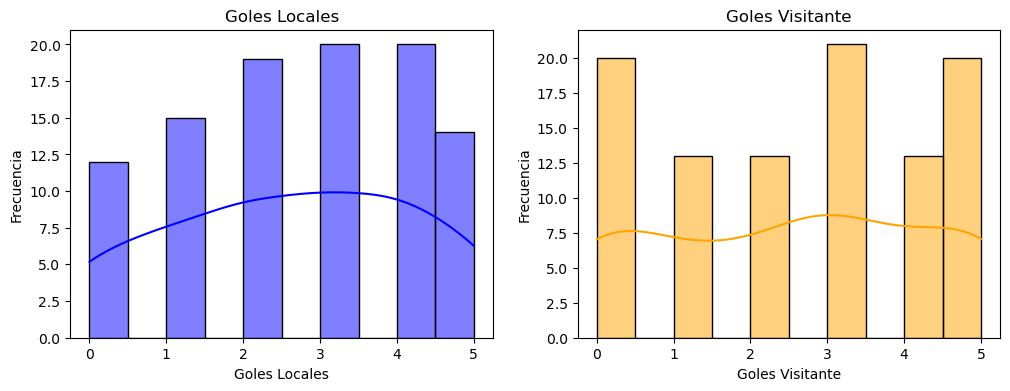

In [24]:
#Histogramas de goles marcados (local y visitante)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_partidos['goles_local'], bins=10, ax=ax[0], color='blue', kde=True)
ax[0].set_title('Goles Locales')
ax[0].set_xlabel('Goles Locales')
ax[0].set_ylabel('Frecuencia')

sns.histplot(df_partidos['goles_visitante'], bins=10, ax=ax[1], color='orange', kde=True)
ax[1].set_title('Goles Visitante')
ax[1].set_xlabel('Goles Visitante')
ax[1].set_ylabel('Frecuencia')

plt.show()

Text(0.5, 1.0, 'Boxplot Goles Visitantes')

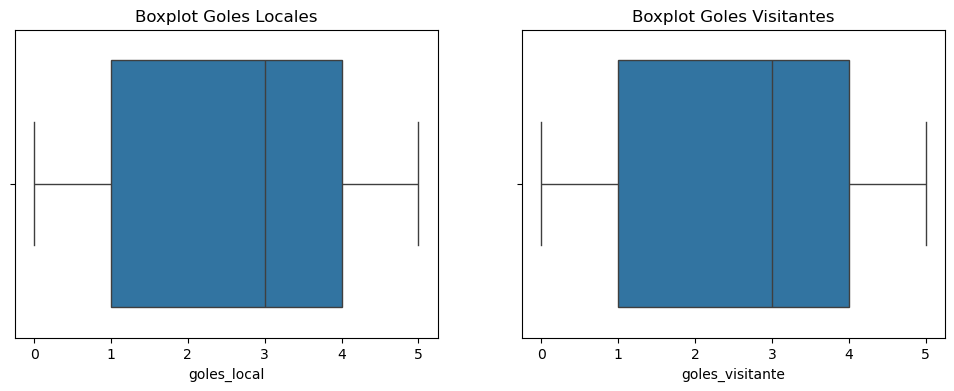

In [35]:
#Boxplot para goles equipo local y equipo visitante
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x=df_partidos['goles_local'], ax=ax[0])
ax[0].set_title('Boxplot Goles Locales')

sns.boxplot(x=df_partidos['goles_visitante'], ax=ax[1])
ax[1].set_title('Boxplot Goles Visitantes')



Text(0, 0.5, 'Goles Visitantes')

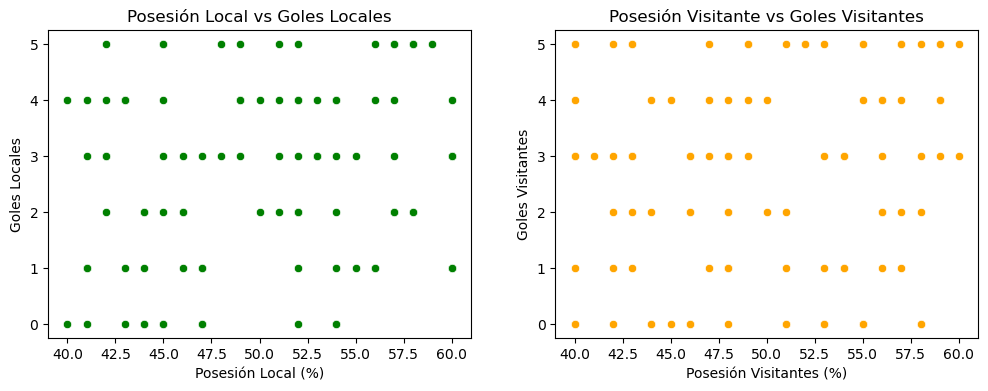

In [39]:
#Scatterplot de posesion vs goles marcados local y visitante
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x='posesion_local (%)', y='goles_local', data=df_partidos, ax=ax[0], color='green')
ax[0].set_title('Posesión Local vs Goles Locales')
ax[0].set_xlabel('Posesión Local (%)')
ax[0].set_ylabel('Goles Locales')

sns.scatterplot(x='posesion_visitante (%)', y='goles_visitante', data=df_partidos, ax=ax[1], color='orange')
ax[1].set_title('Posesión Visitante vs Goles Visitantes')
ax[1].set_xlabel('Posesión Visitantes (%)')
ax[1].set_ylabel('Goles Visitantes')



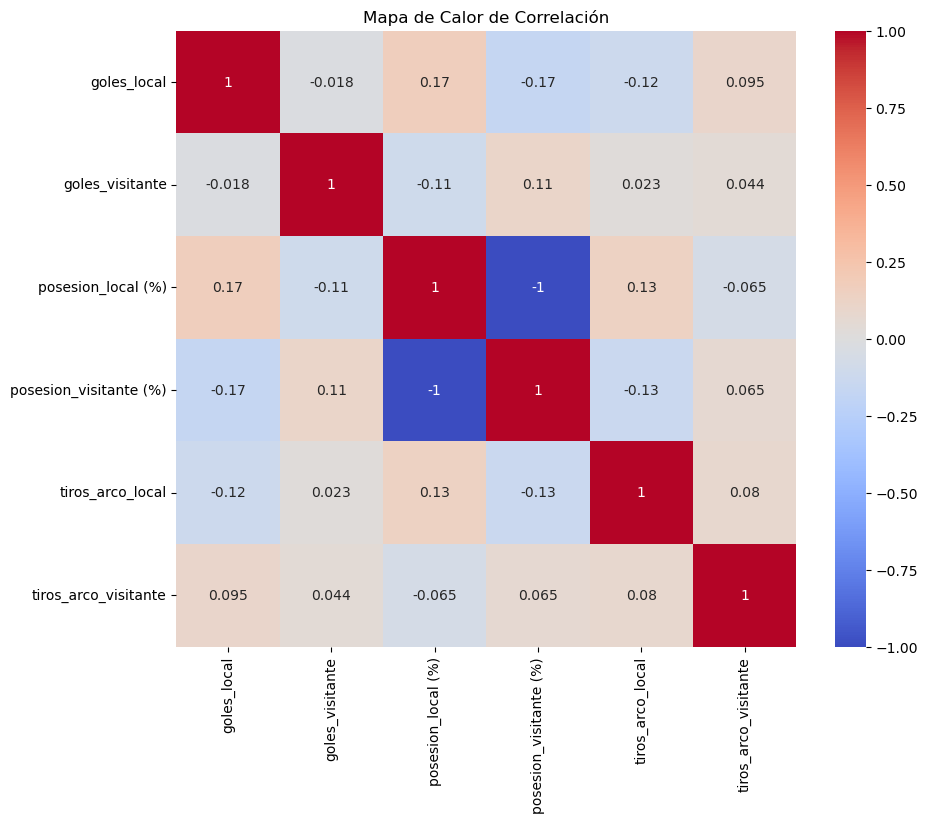

In [41]:
#Mapa de calor para correlacion entre variables clave
plt.figure(figsize=(10, 8))
sns.heatmap(df_partidos[['goles_local', 'goles_visitante', 'posesion_local (%)', 'posesion_visitante (%)', 'tiros_arco_local', 'tiros_arco_visitante']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()